## <div align="center" style="color:#2dba4e"> Data Cleaning </div>

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from rich.jupyter import print as rprint
import ipywidgets as widgets
from rapidfuzz import fuzz as rapidfuzz_fuzz, process as rapidfuzz_process
import warnings

warnings.filterwarnings("ignore")

In [5]:
df=pd.read_csv("./Data/data_to_be_cleaned.csv")
df.head()

,TransactionID,Client,Beneficiary,AmountUSD,TransactionDateTime,ClientTier
0,1,Darth Vader,Luke Skywalker,120.50,2024-06-01 12:30,Gold
1,2,<Frodo Baggins>,Gandalf the Grey,NaN,2024-06-01 12:31,Silver
2,3,Tony Stark,Bruce Banner,300.40,2024-06-01 12:32,Gold
3,4,Tony Stark,Bruce Banner,300.40,2024-06-01 12:32,Gold
4,5,Jon Snow.,Daenerys Targaryen,150.75,2024-06-01 12:33,Platinum


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TransactionID        40 non-null     int64  
 1   Client               38 non-null     object 
 2   Beneficiary          40 non-null     object 
 3   AmountUSD            38 non-null     float64
 4   TransactionDateTime  40 non-null     object 
 5   ClientTier           37 non-null     object 
dtypes: float64(1), int64(1), object(4)
memory usage: 2.0+ KB


None

In [8]:
df["Client"].unique();

array([' Darth Vader', ' <Frodo Baggins>', ' Tony Stark', ' Jon Snow.',
       ' Harry*Potter', ' Luke Skywalker', ' Katniss Everdeen',
       ' Michael Scott.', ' Walter White', 'DARTH VADER',
       ' Frodo Baggins', ' Jon Snow', nan, ' Hermione Granger',
       ' Bruce Wayne', ' -Walter White-', ' Michael Scott',
       ' Sherlock Holmes', ' Neo', ' Samwise Gamgee', ' Ellen Ripley',
       ' Rick Sanchez', ' Indiana Jones', ' James T. Kirk', ' James Bond',
       ' Michael Corleone', ' Jack Sparrow', ' Fox Mulder',
       ' Harry Potter', ' Mario', ' Optimus Prime', ' Clark Kent'],
      dtype=object)

## Fuzzy text search

In [12]:
target = df["Client"].unique()

def interact_data(input_text):
    if not input_text: return
    for data, score, _ in rapidfuzz_process.extract(input_text, target, limit=10):
        print(f"{data:60}{score:3.2f}")


widgets.interact(interact_data, input_text="");

interactive(children=(Text(value='', description='input_text'), Output()), _dom_classes=('widget-interact',))

In [13]:
clean_df=df.copy()

In [15]:
# drop the row where na or missing values in client column
clean_df.dropna(subset=["Client"],inplace=True)

In [16]:
clean_df.columns

Index(['TransactionID', 'Client', 'Beneficiary', 'AmountUSD',
       'TransactionDateTime', 'ClientTier'],
      dtype='object')

In [17]:
clean_df.drop_duplicates(subset=["Client",'Beneficiary', 'AmountUSD','TransactionDateTime', 'ClientTier'],inplace=True)

In [19]:
# Removing special characters from the data set using regex

clean_df["Client"].str.replace("[a-zA-Z0-9 ]","",regex=True).unique()

array(['', '<>', '.', '*', '--'], dtype=object)

In [20]:
# strip only effects prefix and postfix in other words start and end of the word
clean_df["Client"]=clean_df["Client"].str.strip("<>.*- ")

In [21]:
# replace operator replaces specific characters with a new character
clean_df["Client"]=clean_df["Client"].str.replace("*"," ")

In [24]:
# standardize all columns data
clean_df["Client"]=clean_df["Client"].str.upper()
clean_df["Beneficiary"]=clean_df["Beneficiary"].str.upper()


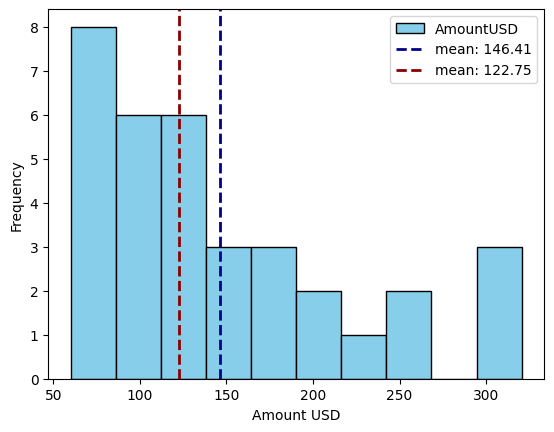

In [26]:
mean_value= clean_df["AmountUSD"].mean()
median_value = clean_df["AmountUSD"].median()

ax =clean_df["AmountUSD"].plot(kind="hist",bins=10,color="skyblue",edgecolor="black")
ax.set_ylabel("Frequency")
ax.set_xlabel("Amount USD")
ax.axvline(mean_value,color="darkblue",linestyle="dashed",linewidth=2,label=f'mean: {mean_value:.2f}')
ax.axvline(median_value,color="darkred",linestyle="dashed",linewidth=2,label=f'mean: {median_value:.2f}')

ax.legend()
plt.show()

In [28]:
# fill na or missing data with median value as it will introduce minimum error to data set 
clean_df.fillna({"AmountUSD": median_value},inplace=True)


In [29]:
clean_df["ClientTier"].value_counts()

 Gold        13
 Silver       9
 Platinum     6
 Bronze       5
Name: ClientTier, dtype: int64

In [30]:
tier_count=clean_df["ClientTier"].value_counts()

<AxesSubplot: >

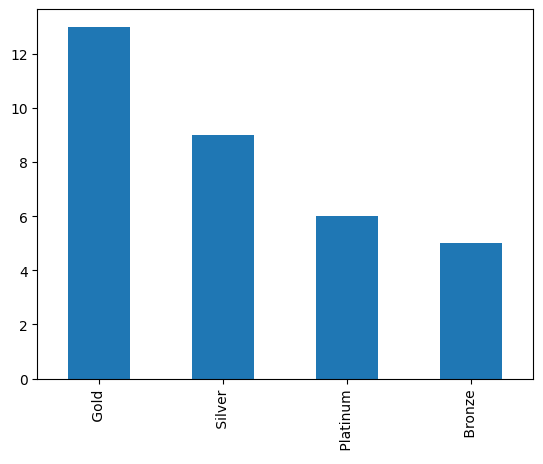

In [31]:
tier_count.plot(kind="bar")

In [34]:
clean_df["ClientTier"]=clean_df["ClientTier"].str.strip()
client_tire_mode=clean_df["ClientTier"].mode()[0]
client_tire_mode

'Gold'